In [499]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import sympy as sp

data = pd.read_csv(r"E:\参加点比赛\数模研赛\data\人口、经济预测数据.csv")
print(data.columns.values)

system = data.loc[:, ['时间']]
system['区域生产总值'] = data['农林消费部门的生产总值'] + data['能源供应部门的生产总值'] + data['工业消费部门的生产总值'] + data['交通消费部门的生产总值'] + data['建筑消费部门的生产总值']
system['常驻人口总量'] = data['常驻人口总量']

['时间' '常驻人口总量' '农林消费部门的生产总值' '能源供应部门的生产总值' '工业消费部门的生产总值' '交通消费部门的生产总值'
 '建筑消费部门的生产总值']


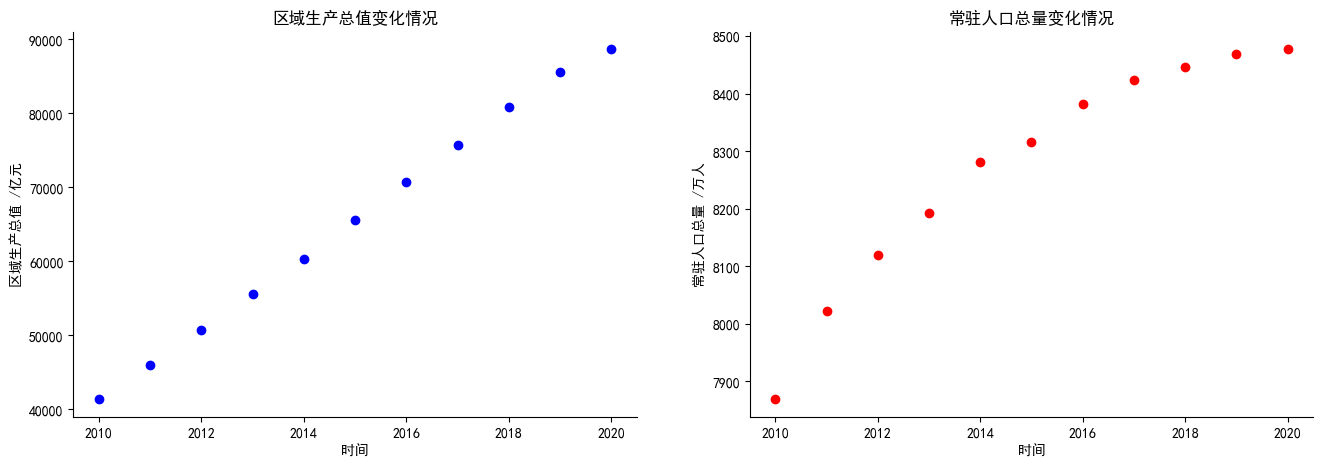

In [251]:
system = data.loc[:, ['时间']]
system['区域生产总值'] = data['农林消费部门的生产总值'] + data['能源供应部门的生产总值'] + data['工业消费部门的生产总值'] + data['交通消费部门的生产总值'] + data['建筑消费部门的生产总值']
system['常驻人口总量'] = data['常驻人口总量']

# 绘制原始数据曲线
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(16, 5))
(ax1, ax2) = fig.subplots(1, 2)

ax1.scatter(system['时间'], system['区域生产总值'], c='b', label='区域碳排放量实际值')
ax1.set_xlabel('时间')
ax1.set_ylabel('区域生产总值 /亿元')
ax1.spines['right'].set_color(None)
ax1.spines['top'].set_color(None)
ax1.set_title('区域生产总值变化情况')

ax2.scatter(system['时间'], system['常驻人口总量'], c='r', label='区域碳排放量实际值')
ax2.set_xlabel('时间')
ax2.set_ylabel('常驻人口总量 /万人')
ax2.spines['right'].set_color(None)
ax2.spines['top'].set_color(None)
ax2.set_title('常驻人口总量变化情况')
plt.savefig(r"E:\参加点比赛\数模研赛\results\T2\经济、人口2010至2020变化情况.jpg", dpi=500)

4873.3061716064*x - 9754168.91396871
6235.75092018028*x - 12499826.6618411


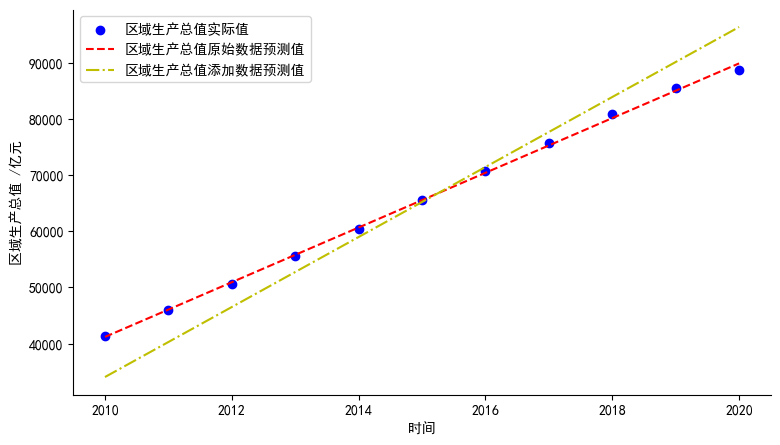

In [331]:
# 对区域生产总值做拟合
x = system['时间'].values.tolist()
y = system['区域生产总值'].values.tolist()

# 获取拟合结果
def function(x, a, b): # 拟合函数
    return a*x + b

initial_guess = (1, 1) # 初始值

params, covariance = curve_fit(function, x, y, p0=initial_guess) # 输入：拟合函数、自变量、应变量、初始值

a, b = params # 拟合结果

# 建立拟合预测方程
x = sp.symbols('x') # 定义符号变量

predict = a*x + b 
print(predict)

# 预测结果
for i in range(system.shape[0]):
    system.loc[i, ['区域生产总值原始数据预测值']] = predict.subs(x, system.loc[i, ['时间']].values[0])


# 对区域生产总值做拟合
x = system['时间'].values.tolist() + [2035, 2060]
y = system['区域生产总值'].values.tolist() + [y[10]*2, y[10]*4]

# 获取拟合结果
def function(x, a, b): # 拟合函数
    return a*x + b

initial_guess = (1, 1) # 初始值

params, covariance = curve_fit(function, x, y, p0=initial_guess) # 输入：拟合函数、自变量、应变量、初始值

a, b = params # 拟合结果

# 建立拟合预测方程
x = sp.symbols('x') # 定义符号变量

predict = a*x + b 
print(predict)

# 预测结果
for i in range(system.shape[0]):
    system.loc[i, ['区域生产总值添加数据预测值']] = predict.subs(x, system.loc[i, ['时间']].values[0])

# 绘制拟合结果与实际结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['区域生产总值'], c='b', label='区域生产总值实际值') 
ax.plot(system['时间'], system['区域生产总值原始数据预测值'], c='r', linestyle='--', label='区域生产总值原始数据预测值') 
ax.plot(system['时间'], system['区域生产总值添加数据预测值'], c='y', linestyle='-.', label='区域生产总值添加数据预测值') 
ax.set_xlabel('时间') 
ax.set_ylabel('区域生产总值 /亿元') 
ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.legend()

plt.savefig(r"E:\参加点比赛\数模研赛\results\T3\区域生产总值预测对比（无条件+翻倍）.jpg", dpi=500)

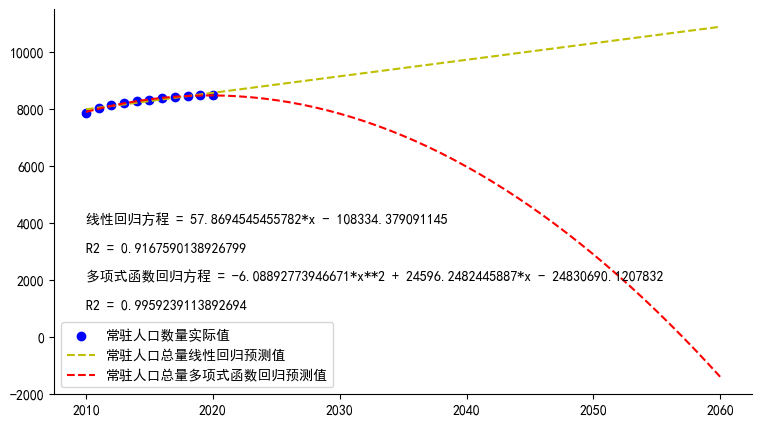

In [495]:
# 对区域生产总值做拟合
x = system['时间'].values.tolist()
y = system['常驻人口总量'].values.tolist()

# 关于x，y做线性回归
x = system['时间'].values.tolist()
y = system['常驻人口总量'].values.tolist()
# 拟合出参数
def function_linear(x, a1, b1):
    return a1*x + b1
init = (1, 1)
params, convariance = curve_fit(function_linear, x, y, p0=init)
a1, b1 = params
# 建立线性回归函数
x = sp.symbols('x')
predict_linear = a1*x + b1

# 关于x，y做多项式函数回归
x = system['时间'].values.tolist()
y = system['常驻人口总量'].values.tolist()
# 拟合出参数
def function_poly(x, a, b, c):
    return a * x**2 + b * x + c
init = (1, 1, 1)
params, convariance = curve_fit(function_poly, x, y, p0=init)
a, b, c = params
# 建立多项式函数回归函数
x = sp.symbols('x')
predict_poly = a*(x**2) + b*x +c

system_pre = pd.DataFrame({'时间': [i for i in range(2010, 2061)]})
system_pre['常驻人口总量线性回归预测值'] = 99
system_pre['常驻人口总量多项式函数回归预测值'] = 99
for i in range(system_pre.shape[0]):
    system_pre.loc[i, ['常驻人口总量线性回归预测值']] = predict_linear.subs(x, system_pre.loc[i, ['时间']].values[0])
    system_pre.loc[i, ['常驻人口总量多项式函数回归预测值']] = predict_poly.subs(x, system_pre.loc[i, ['时间']].values[0])

# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['常驻人口总量'], c='b', label='常驻人口数量实际值')
ax.plot(system_pre['时间'], system_pre['常驻人口总量线性回归预测值'], c='y', linestyle='--', label='常驻人口总量线性回归预测值')
ax.text(system_pre['时间'][0], 4000, "线性回归方程 = {}".format(predict_linear))
ax.text(system_pre['时间'][0], 3000, "R2 = {}".format(r2_score(system['常驻人口总量'], system_pre['常驻人口总量线性回归预测值'][:11])))

ax.plot(system_pre['时间'], system_pre['常驻人口总量多项式函数回归预测值'], c='r', linestyle='--', label='常驻人口总量多项式函数回归预测值')
ax.text(system_pre['时间'][0], 2000, "多项式函数回归方程 = {}".format(predict_poly))
ax.text(system_pre['时间'][0], 1000, "R2 = {}".format(r2_score(system['常驻人口总量'], system_pre['常驻人口总量多项式函数回归预测值'][:11])))
ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.legend()

plt.savefig(r"E:\参加点比赛\数模研赛\results\T2\常驻人口数量实际值及两种回归预测值对比图.jpg", dpi=500)
system_pre.to_csv(r"E:\参加点比赛\数模研赛\results\T2\常驻人口数量实际值及两种回归预测值对比表.csv", encoding='utf-8-sig', index=False)

### 三种情景人口预测

In [501]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import sympy as sp

data = pd.read_csv(r"E:\参加点比赛\数模研赛\data\人口、经济预测数据.csv")

system = data.loc[:, ['时间']]
system['区域生产总值'] = data['农林消费部门的生产总值'] + data['能源供应部门的生产总值'] + data['工业消费部门的生产总值'] + data['交通消费部门的生产总值'] + data['建筑消费部门的生产总值']
system['常驻人口总量'] = data['常驻人口总量']

# 对常驻人口总量做拟合
x = system['时间'].values.tolist()
y = system['常驻人口总量'].values.tolist()

# 关于x，y做线性回归
x = system['时间'].values.tolist()
y = system['常驻人口总量'].values.tolist()
# 拟合出参数
def function_linear(x, a1, b1):
    return a1*x + b1
init = (1, 1)
params, convariance = curve_fit(function_linear, x, y, p0=init)
a1, b1 = params
# 建立线性回归函数
x = sp.symbols('x')
predict_linear = a1*x + b1

# 关于x，y做多项式函数回归
x = system['时间'].values.tolist()
y = system['常驻人口总量'].values.tolist()
# 拟合出参数
def function_poly(x, a, b, c):
    return a * x**2 + b * x + c
init = (1, 1, 1)
params, convariance = curve_fit(function_poly, x, y, p0=init)
a, b, c = params
# 建立多项式函数回归函数
x = sp.symbols('x')
predict_poly = a*(x**2) + b*x +c

# 预测结果
system_pre = pd.DataFrame({'时间': [i for i in range(2010, 2061)]})

predict_zh1 = 0.6*predict_linear + 0.4*predict_poly
predict_zh2 = 0.8*predict_linear + 0.2*predict_poly
predict_zh3 = 0.9*predict_linear + 0.1*predict_poly

system_pre['常驻人口总量情景1组合预测值'] = 99
# 计算每组权重下的组合预测值
for i in range(system_pre.shape[0]):
    t = system_pre.loc[i, ['时间']].values[0]
    pt = predict_zh1.subs(x, t)
    system_pre.loc[i, ['常驻人口总量情景1组合预测值']] = pt

system_pre['常驻人口总量情景2组合预测值'] = 99
# 计算每组权重下的组合预测值
for i in range(system_pre.shape[0]):
    t = system_pre.loc[i, ['时间']].values[0]
    pt = predict_zh2.subs(x, t)
    system_pre.loc[i, ['常驻人口总量情景2组合预测值']] = pt

system_pre['常驻人口总量情景3组合预测值'] = 99
# 计算每组权重下的组合预测值
for i in range(system_pre.shape[0]):
    t = system_pre.loc[i, ['时间']].values[0]
    pt = predict_zh3.subs(x, t)
    system_pre.loc[i, ['常驻人口总量情景3组合预测值']] = pt

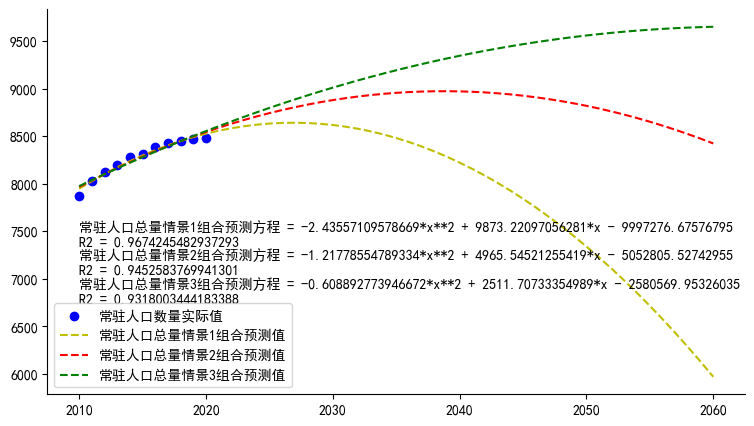

In [502]:
# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['常驻人口总量'], c='b', label='常驻人口数量实际值')

ax.plot(system_pre['时间'], system_pre['常驻人口总量情景1组合预测值'], c='y', linestyle='--', label='常驻人口总量情景1组合预测值')
ax.text(system_pre['时间'][0], 7500, "常驻人口总量情景1组合预测方程 = {}".format(predict_zh1))
ax.text(system_pre['时间'][0], 7350, "R2 = {}".format(r2_score(system['常驻人口总量'], system_pre['常驻人口总量情景1组合预测值'][:11])))

ax.plot(system_pre['时间'], system_pre['常驻人口总量情景2组合预测值'], c='r', linestyle='--', label='常驻人口总量情景2组合预测值')
ax.text(system_pre['时间'][0], 7200, "常驻人口总量情景2组合预测方程 = {}".format(predict_zh2))
ax.text(system_pre['时间'][0], 7050, "R2 = {}".format(r2_score(system['常驻人口总量'], system_pre['常驻人口总量情景2组合预测值'][:11])))

ax.plot(system_pre['时间'], system_pre['常驻人口总量情景3组合预测值'], c='g', linestyle='--', label='常驻人口总量情景3组合预测值')
ax.text(system_pre['时间'][0], 6900, "常驻人口总量情景3组合预测方程 = {}".format(predict_zh3))
ax.text(system_pre['时间'][0], 6750, "R2 = {}".format(r2_score(system['常驻人口总量'], system_pre['常驻人口总量情景3组合预测值'][:11])))

ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.legend()

plt.savefig(r"E:\参加点比赛\数模研赛\results\T2\常驻人口数量实际值及组合预测对比图.jpg", dpi=500)
system_pre.to_csv(r"E:\参加点比赛\数模研赛\results\T2\常驻人口数量实际值及组合预测对比表.csv", encoding='utf-8-sig', index=False)

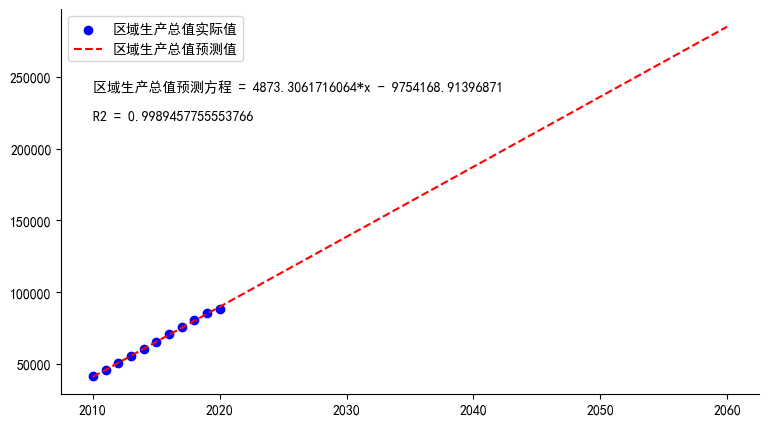

In [514]:
# 对区域生产总值做拟合
x = system['时间'].values.tolist()
y = system['区域生产总值'].values.tolist()
# 关于x，y做线性回归
x = system['时间'].values.tolist()
y = system['区域生产总值'].values.tolist()
# 拟合出参数
def function_linear(x, a, b):
    return a*x + b
init = (1, 1)
params, convariance = curve_fit(function_linear, x, y, p0=init)
a, b = params
# 建立线性回归函数
x = sp.symbols('x')
predict_gdp = a*x + b

# 计算区域生产总值预测值
system_pre['区域生产总值预测值'] = 99
for i in range(system_pre.shape[0]):
    t = system_pre.loc[i, ['时间']].values[0]
    gdpt = predict_gdp.subs(x, t)
    system_pre.loc[i, ['区域生产总值预测值']] = gdpt

# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['区域生产总值'], c='b', label='区域生产总值实际值')

ax.plot(system_pre['时间'], system_pre['区域生产总值预测值'], c='r', linestyle='--', label='区域生产总值预测值')
ax.text(system_pre['时间'][0], 240000, "区域生产总值预测方程 = {}".format(predict_gdp))
ax.text(system_pre['时间'][0], 220000, "R2 = {}".format(r2_score(system['区域生产总值'], system_pre['区域生产总值预测值'][:11])))

ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.legend()

plt.savefig(r"E:\参加点比赛\数模研赛\results\T2\区域生产总值预测图.jpg", dpi=500)
system_pre.to_csv(r"E:\参加点比赛\数模研赛\results\T2\区域生产总值预测表.csv", encoding='utf-8-sig', index=False)